In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
from sklearn.model_selection import train_test_split

name = f"cats-vs-dog-with-tensorboard-{int(time.time())}"

tensorboard = TensorBoard(log_dir=f'gvclogs/{name}.')

X = np.array(pickle.load(open("X.pickle", "rb")))
y = np.array(pickle.load(open("y.pickle", "rb")))

X = X/255.0

model = Sequential()

model.add(Conv2D(64, (5, 5), strides=(1, 1), activation='relu', input_shape = X.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(64, (5, 5), strides=(2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1, callbacks=[tensorboard])

Epoch 1/10
702/702 [==============================] - 100s 142ms/step - loss: 0.6149 - accuracy: 0.6754 - val_loss: 0.5879 - val_accuracy: 0.6766
Epoch 2/10
702/702 [==============================] - 98s 140ms/step - loss: 0.5184 - accuracy: 0.7470 - val_loss: 0.6499 - val_accuracy: 0.6285
Epoch 3/10
702/702 [==============================] - 101s 144ms/step - loss: 0.4693 - accuracy: 0.7763 - val_loss: 0.5034 - val_accuracy: 0.7531
Epoch 4/10
702/702 [==============================] - 103s 146ms/step - loss: 0.4267 - accuracy: 0.8011 - val_loss: 0.5549 - val_accuracy: 0.7299
Epoch 5/10
702/702 [==============================] - 99s 140ms/step - loss: 0.3813 - accuracy: 0.8229 - val_loss: 1.2818 - val_accuracy: 0.6236
Epoch 6/10
702/702 [==============================] - 99s 141ms/step - loss: 0.3438 - accuracy: 0.8465 - val_loss: 0.7580 - val_accuracy: 0.6974
Epoch 7/10
702/702 [==============================] - 99s 141ms/step - loss: 0.2970 - accuracy: 0.8714 - val_loss: 0.9141 - val

In [4]:
model.save('NewCatsvDogs')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: NewCatsvDogs/assets


In [5]:
prediction = model.predict([X[:-1]])

In [6]:
print(prediction)

[[4.1148067e-04]
 [8.6247921e-04]
 [2.5194883e-04]
 ...
 [2.8096813e-01]
 [9.9821389e-01]
 [9.1613114e-01]]


<function matplotlib.pyplot.show(*args, **kw)>

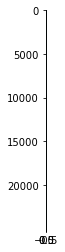

In [16]:
import matplotlib.pyplot as plt

plt.imshow(prediction)
plt.show

In [9]:
print(np.argmax(prediction))

255
